In [1]:
import sqlalchemy
from os import environ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# from jupyter_dash import JupyterDash
# from dash import html
# from dash.dependencies import Input, Output
# import plotly.express as px
# from dash import dcc

In [2]:
engine = sqlalchemy.create_engine("mariadb+mariadbconnector://"+environ.get("USER")+\
                                  ":"+environ.get("PSWD")+"@127.0.0.1:3306/nba")

In [3]:
A_cols = ['A.Name', 'Matchup', 'Game_day', 'Result','MINS', 'PTS',
 'FGM', 'FGA', 'FGP', 'PM3', 'PA3', 'P3P', 'FTM', 'FTA','FTP',
 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF','Game_ID']

A_cols = ", ".join(A_cols)

In [4]:
fields = "* "

inner_join =  "Box_scores INNER JOIN Players on Box_scores.Player_ID = Players.ID) A "

inner_select = "(SELECT * FROM " + inner_join 

outer_join = "INNER JOIN Teams on Teams.ID=A.Team_ID "

outer_select = "SELECT " + A_cols +  ", Teams.Name as Team FROM " + inner_select  + outer_join

# "ORDER BY Game_day desc"

In [5]:
box_scores = pd.read_sql(outer_select,engine,parse_dates=["Game_day"])

In [6]:
df = box_scores.groupby(["Team","Name"],as_index=False).sum()

In [7]:
det = df[df['Team']=='DET']

In [8]:
det = det.round(1)

In [9]:
# det['POSS_kept'] = 100*det['OREB']/((det['FGA']-det['FGM'])+\
#                                     (det['FTA']-det['FTM']))

In [10]:
det['FGP'] = 100*det['FGM']/det['FGA']
det['FTP'] = 100*det['FTM']/det['FTA']
det['P3P'] = 100*det['PM3']/det['PA3']
det['eFG'] = 100*(det['FGM']+.5*det['PM3'])/det['FGA']

In [11]:
det["%OREB"] = 100*det["OREB"]/det["OREB"].sum()
det["%DREB"] = 100*det["DREB"]/det["DREB"].sum()
det["%PTS"] = 100*det["PTS"]/det["PTS"].sum()
det["%AST"] = 100*det["AST"]/det["AST"].sum()
det["%3"] = 100*det["PM3"]/det["PM3"].sum()
det["%FG"] = 100*det["FGM"]/det["FGM"].sum()
det["%FT"] = 100*det["FTM"]/det["FTM"].sum()
det["%STL"] = 100*det["STL"]/det["STL"].sum()
det["%TOV"] = 100*det["TOV"]/det["TOV"].sum()
det["%BLK"] = 100*det["BLK"]/det["BLK"].sum()
det["FTR"] = 100*det["FTA"]/det["FGA"]
det = det.round(1)

In [12]:
det.head()

,Team,Name,MINS,PTS,FGM,FGA,FGP,PM3,PA3,P3P,...,%DREB,%PTS,%AST,%3,%FG,%FT,%STL,%TOV,%BLK,FTR
190,DET,Braxton Key,55,18,8,21,38.1,2,3,66.7,...,0.3,0.2,0.0,0.2,0.3,0.0,0.5,0.3,1.1,0.0
191,DET,Cade Cunningham,1965,1046,403,970,41.5,113,350,32.3,...,11.6,13.2,19.0,13.3,13.9,9.8,12.4,21.3,11.3,15.6
192,DET,Cassius Stanley,155,52,19,46,41.3,4,17,23.5,...,0.6,0.7,0.2,0.5,0.7,0.8,0.9,0.6,0.6,21.7
193,DET,Cheick Diallo,31,11,3,8,37.5,0,0,NaN,...,0.3,0.1,0.0,0.0,0.1,0.4,0.2,0.1,0.0,75.0
194,DET,Cory Joseph,1576,513,176,394,44.7,63,153,41.2,...,6.0,6.5,13.4,7.4,6.1,7.5,7.0,8.2,4.7,28.2


Text(0.5, 0, 'Percentage')

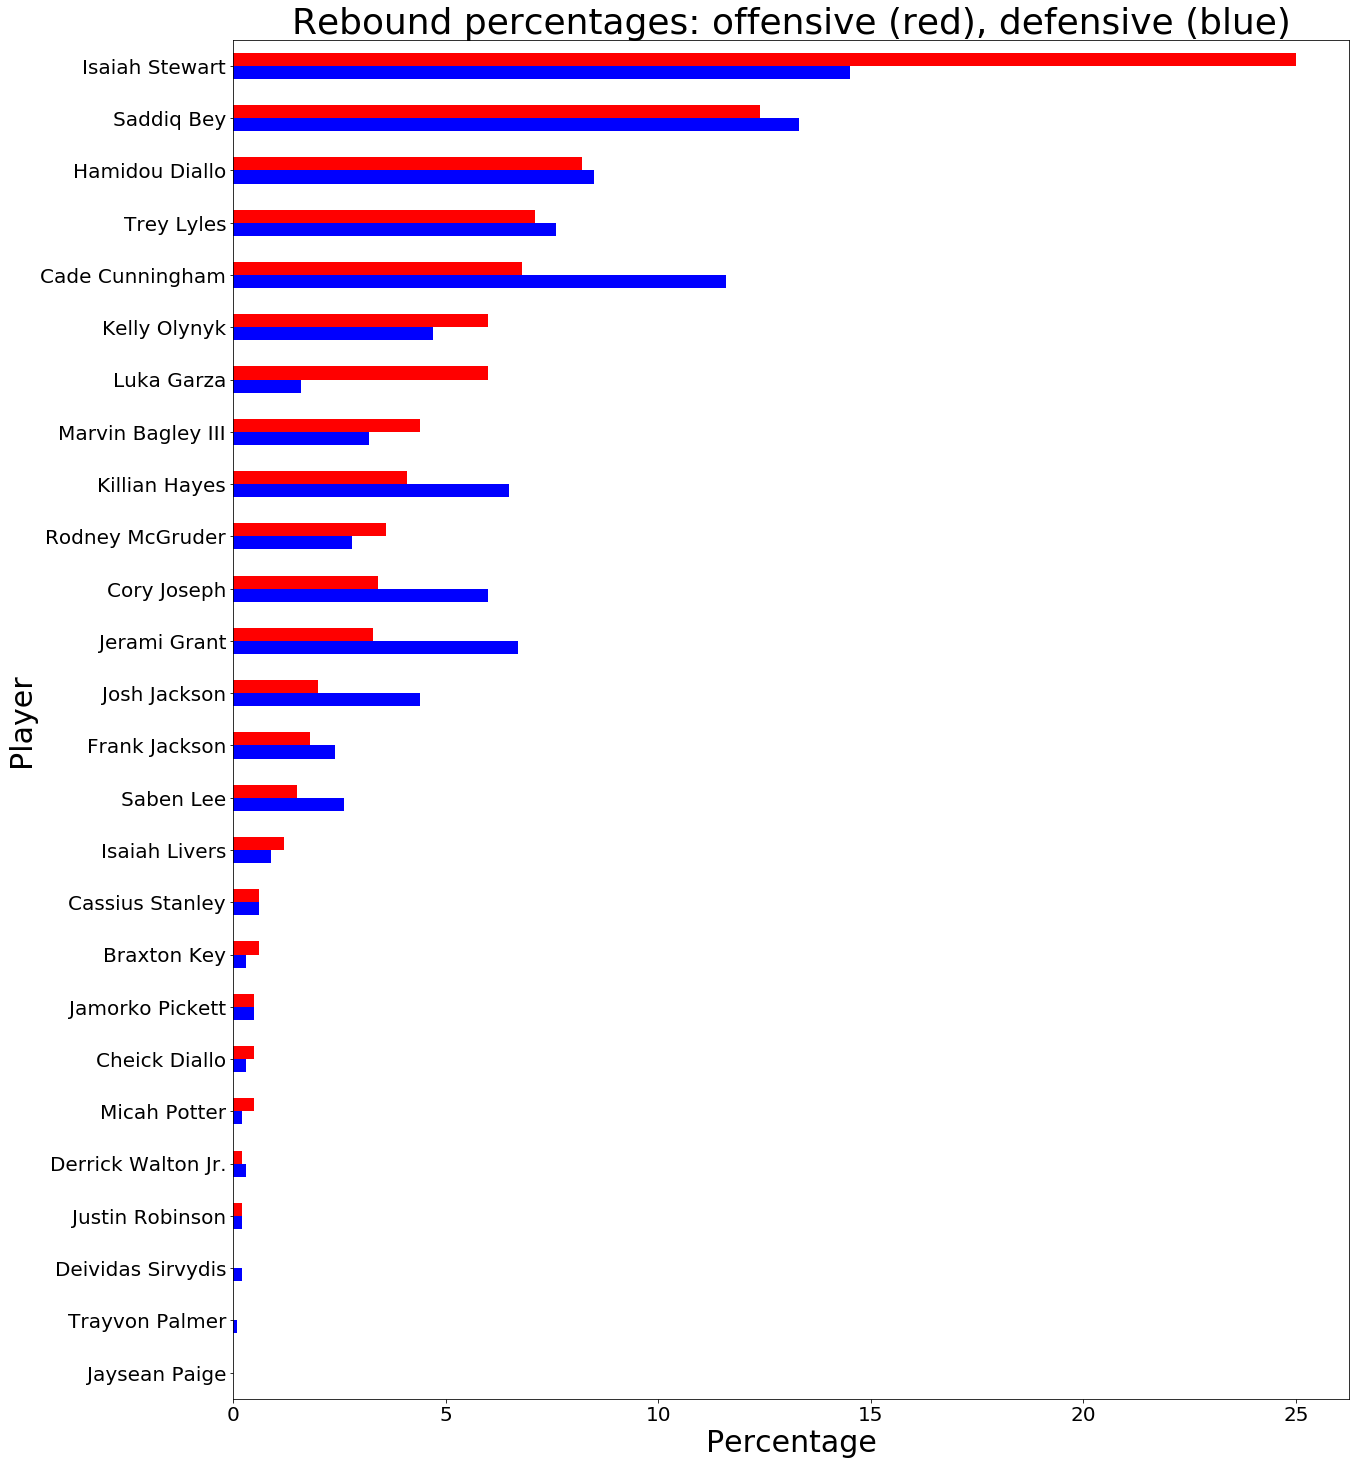

In [13]:
plt.rcParams.update({'font.size': 30})
det.sort_values('%OREB').plot(kind = 'barh',x='Name',y=['%DREB','%OREB'],fontsize= 20,
                              title= "Rebound percentages: offensive (red), defensive (blue)",
                              color = ['blue','red'],figsize=(20,25),ylabel= "%",xlabel = 'Player',legend=False)
plt.xlabel('Percentage')

In [51]:
det.columns

Index(['Team', 'Name', 'MINS', 'PTS', 'FGM', 'FGA', 'FGP', 'PM3', 'PA3', 'P3P',
       'FTM', 'FTA', 'FTP', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'PF', 'eFG', '%OREB', '%DREB', '%PTS', '%AST', '%3', '%FG', '%FT',
       '%STL', '%TOV', '%BLK', 'FTR'],
      dtype='object')

In [36]:
fgm = list(det.columns).index('FGM')
pts = list(det.columns).index('PTS')
name = list(det.columns).index('Name')

8 18 Braxton Key
403 1046 Cade Cunningham
19 52 Cassius Stanley
3 11 Cheick Diallo
176 513 Cory Joseph
1 3 Deividas Sirvydis
6 19 Derrick Walton Jr.
173 491 Frank Jackson
261 636 Hamidou Diallo
22 63 Isaiah Livers
236 548 Isaiah Stewart
8 21 Jamorko Pickett
0 0 Jaysean Paige
298 904 Jerami Grant
103 276 Josh Jackson
9 28 Justin Robinson
117 329 Kelly Olynyk
146 382 Killian Hayes
58 166 Luka Garza
108 254 Marvin Bagley III
5 12 Micah Potter
82 229 Rodney McGruder
60 175 Saben Lee
420 1235 Saddiq Bey
0 0 Trayvon Palmer
175 532 Trey Lyles


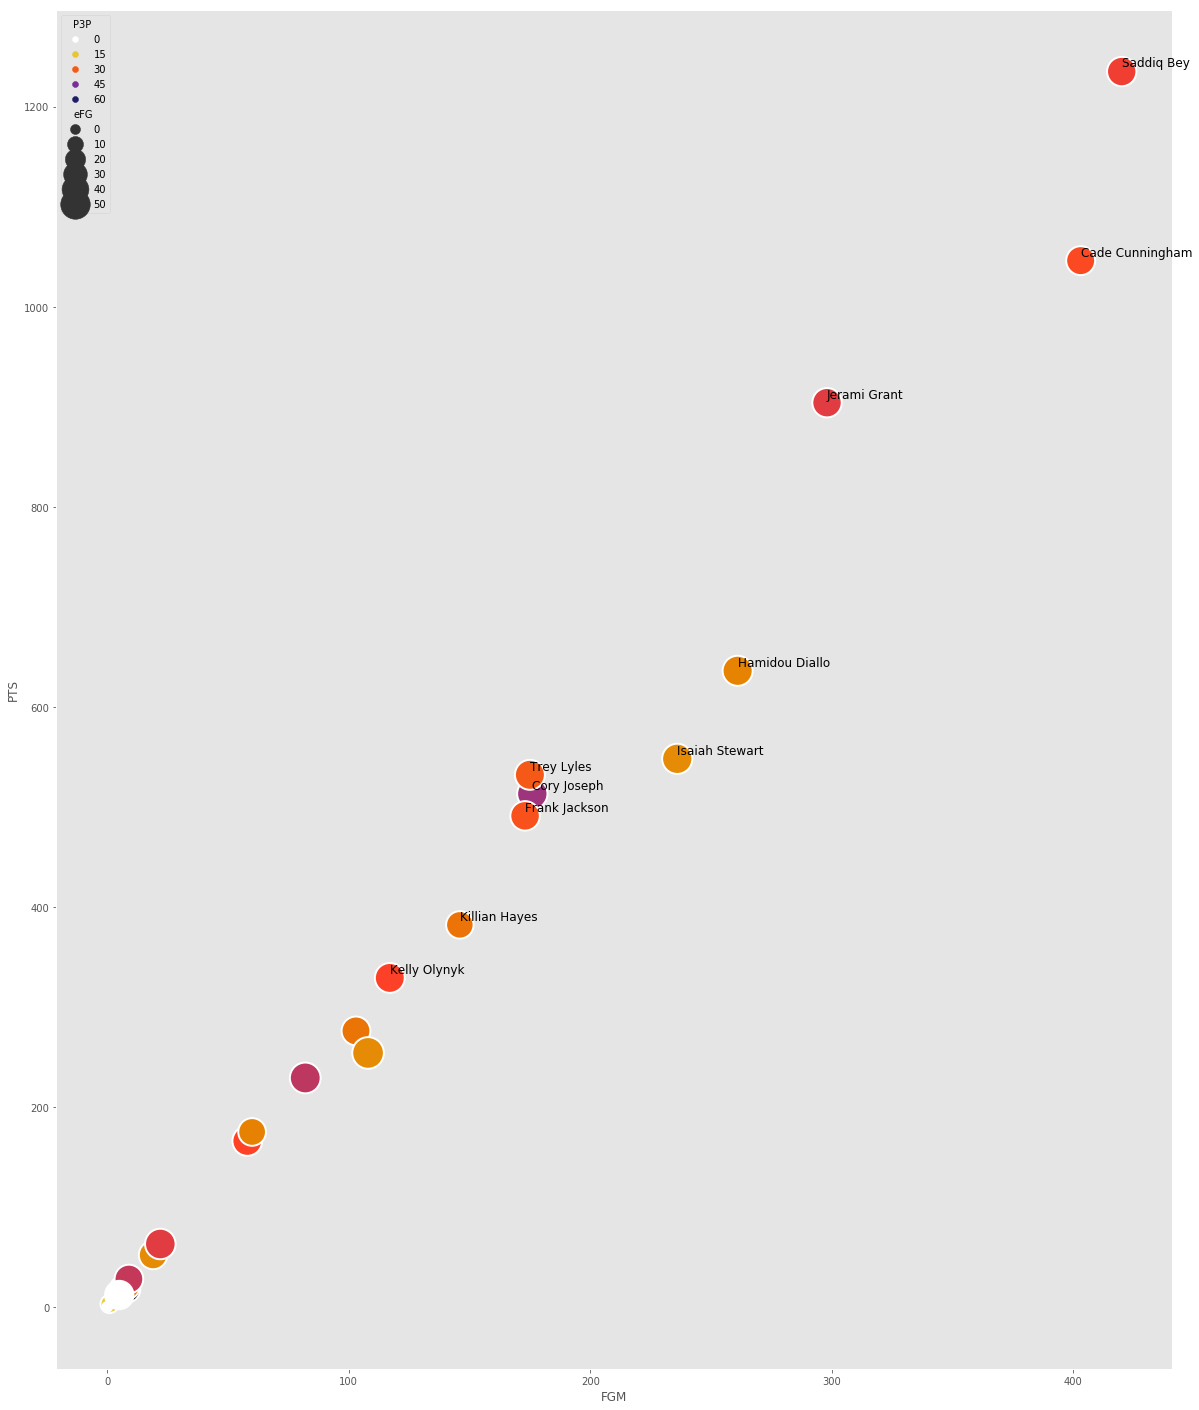

In [113]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(20,25))


ax = sns.scatterplot(y='PTS',x='FGM',size='eFG',hue= 'P3P',data=det,sizes=(100, 1000),palette='CMRmap_r',
                hue_norm=(det['P3P'].min(),det['P3P'].max()),
                size_norm=(det['eFG'].min(),det['eFG'].max()),alpha=1)

ax.grid(False)

a = 0
for i in det.sort_values('PTS',ascending=False).iterrows():
    if(a<10):
        ax.text(i[1][fgm],i[1][pts]+5,i[1][name], size="large", color="black")
    else:
        break
    a+=1

In [115]:
# plt.style.use('ggplot')
# det.plot(kind = 'scatter',x='FGM',y='PTS',fontsize= 20,
#                               title= "PTS vs FGM",s = 'eFG',
#                               color = 'P3P',figsize=(20,25),legend=False)
# a = 0
# for i in det.sort_values('PTS',ascending=False).iterrows():
#     if(a<10):
#         plt.text(i[1][fgm],i[1][pts],i[1][name])
#     else:
#         break
#     a+=1

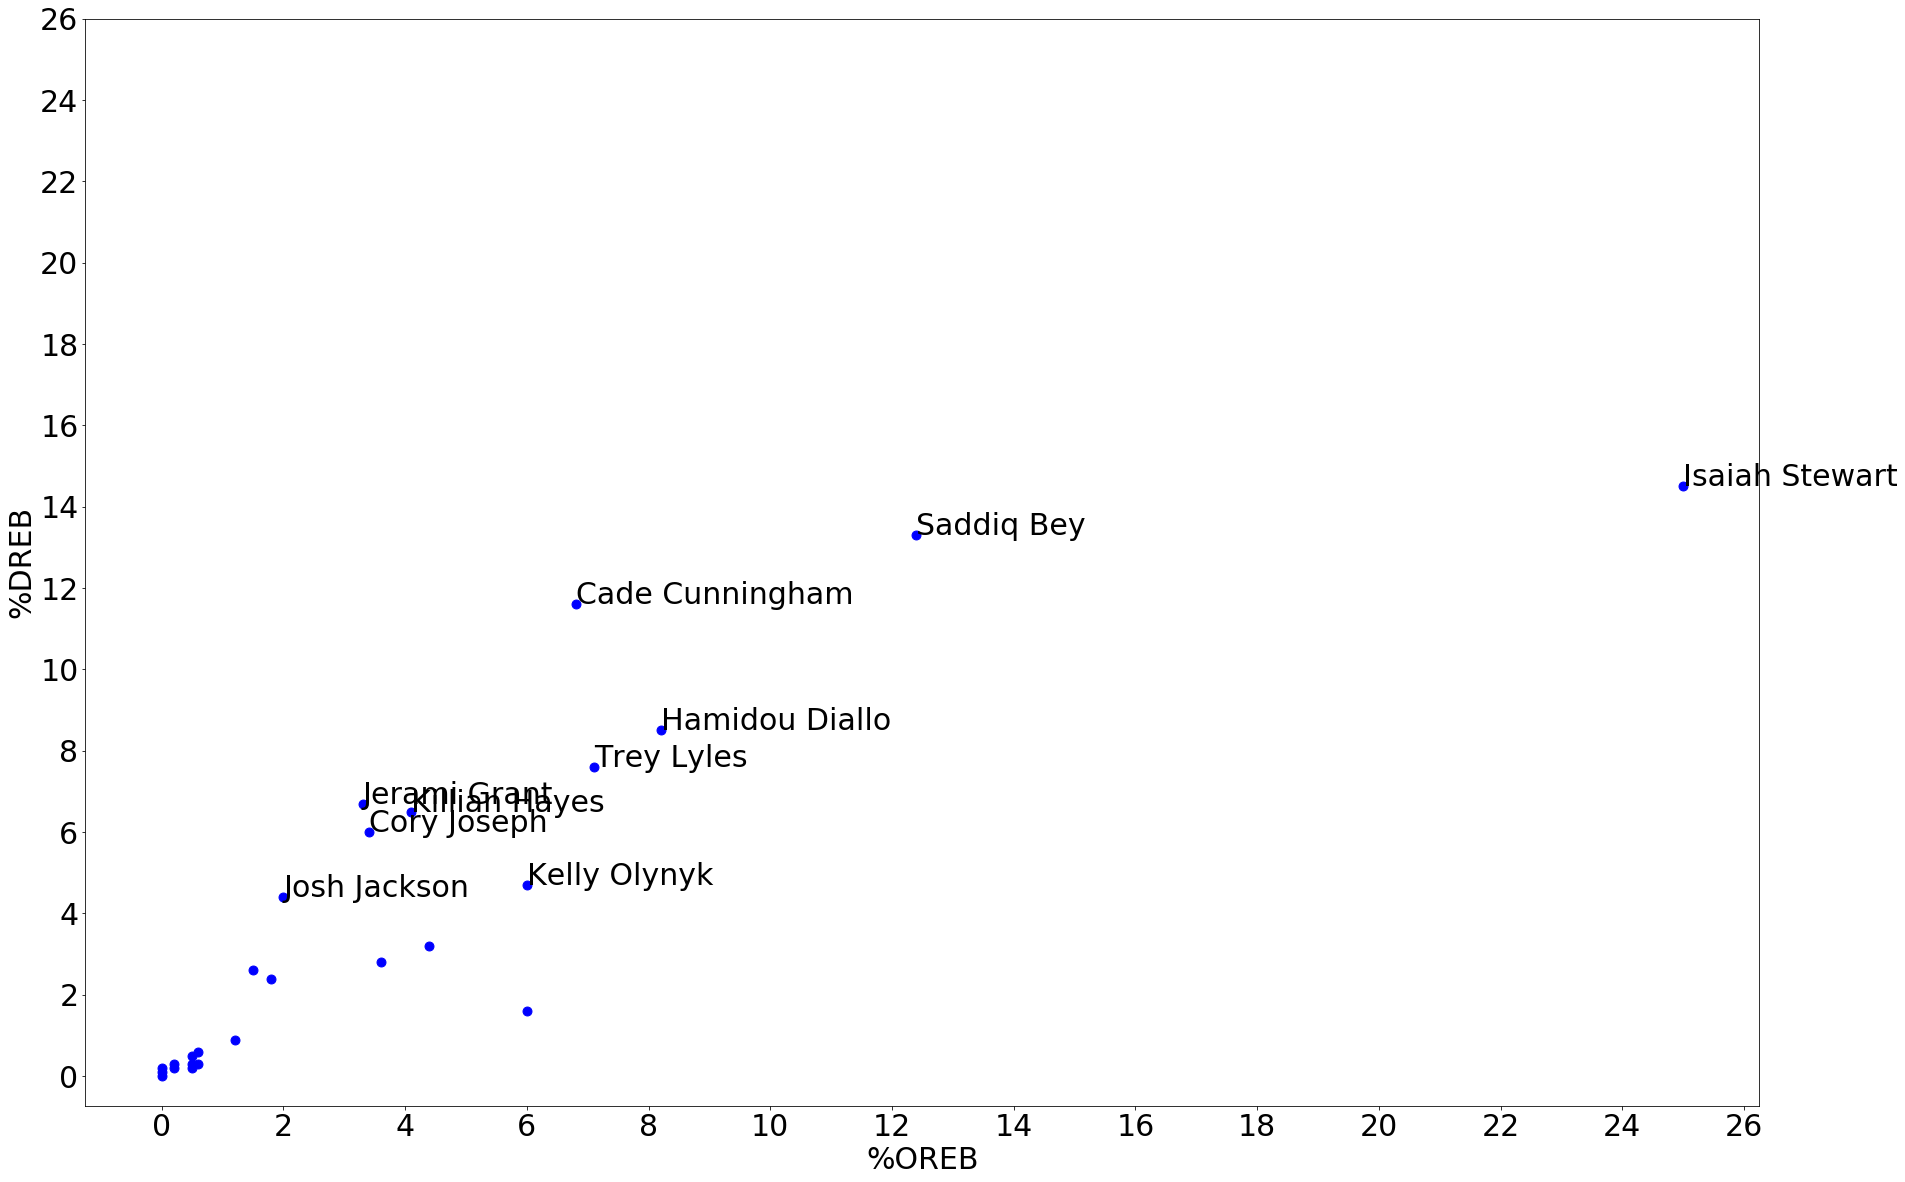

In [45]:
det.plot(kind='scatter',x='%OREB',y='%DREB',figsize=(30,20),c='blue',s=80,xticks=range(0,27,2),yticks=range(0,27,2))
# plt.plot(x=list(range(0,27,2)),y=list(range(0,27,2)))
a = 0
f = list(det.columns).index('%OREB')
h = list(det.columns).index('%DREB')
name = list(det.columns).index('Name')
for i in det.sort_values('%DREB',ascending=False).iterrows():
    if(a<10):
        plt.text(i[1][f],i[1][h],i[1][name])
    else:
        break
    a+=1
plt.show()

In [46]:
det['DREB'].sum()

2436

In [47]:
det['OREB'].sum()

844

In [15]:
def fg_part(det):
    mins_share = det['MINS']/(det['MINS'].sum()/5)
    
    q5_denom = det['FGM'].sum() - det['FGM']

    q5_num = det['AST'].sum() - det['AST']

    q5 = q5_num / q5_denom

    q12_num =(det['AST'].sum()/det['MINS'].sum()) * det['MINS'] * 5 - det['AST']

    q12_denom =(det['FGM'].sum()/det['MINS'].sum()) * det['MINS'] * 5 - det['FGM']

    q12 = q12_num/q12_denom
    
    q_ast = mins_share*q5 +(1-mins_share)*q12
    
    return (det['FGM'] * (1-.5*((det['PTS']-det['FTM'])/(2*det['FGA']))*q_ast)).fillna(0)

In [16]:
def ast_part(det):
    num = det['PTS'].sum() - det['FTM'] - det['PTS'] - det['FTM']
    
    denom = 2 * (det['FGA'].sum()-det['FGA'])
    
    return (.5* (num/denom) *det['AST']).fillna(0)

In [17]:
def ft_part(det):
    return ((1-(1-det['FTP'])**2)*.44*det['FTA']).fillna(0)

In [33]:
def team_sc_poss(det):
    q = (5*det['MINS']*det['AST'].sum())/det['MINS'].sum() -det['AST']
    
    r = 5*(det['MINS']*det['FGM'].sum())/det['MINS'].sum() - det['AST']
    
    return det['FGM'] - .37*det['FGM']*(q/r) + .37*det['AST'] + .5*det['FTM']

In [42]:
def play_per(det):
    return det['FGM'].sum()/(det['FGA']-det['OREB']+det['TOV'])

In [22]:
def get_opps_dreb(df):
    sums = df[df['Matchup'].str.contains('DET')].groupby(['Team','Matchup']).sum()

    return sums.drop(index='DET').droplevel('Team')

In [34]:
def reorder_index(sums):
    idxs = []
    for i in sums.index:
        tmp = i.split(' @ ')
        if(len(tmp)>1):
            idxs.append(tmp[1]+' vs. '+tmp[0])
        else:
            tmp = i.split(' vs. ')
            idxs.append(tmp[1]+' @ '+tmp[0])
    sums['New'] = idxs
    
    return sums.set_index('New')

In [38]:
def team_oreb_per(df,det):
    team = df[df['Matchup'].str.contains('DET')].groupby(['Team','Matchup'],as_index=False).sum()
    team = team[team['Team'].str.contains("DET$",regex=True)].set_index('Matchup')
    
    team = reorder_index(team)
    
    opps = get_opps_dreb(box_scores)
    div = len(opps.index)

    return det['OREB'].sum() / (det['OREB'].sum()+opps['DREB'].sum())

In [39]:
team_oreb_per(box_scores,det)

0.2367461430575035

In [44]:
def tmoreb_weight(tmor_per, tmplay_per):
    num = (1-tmor_per) * tmplay_per
    denom = (1-tmor_per)*tmplay_per +  tmor_per* (1-tmplay_per)
    
    return num/denom

In [49]:
def scoring_possessions(df, det):
    first_part = fg_part(det) + ast_part(det) + ft_part(det)
    
    tmpl_per = play_per(det)
    tmorw = tmoreb_weight(team_oreb_per(df,det),tmpl_per)
    
    tmorb = det['OREB'].sum()
    tmsc_poss = team_sc_poss(det)
    
    factor = 1 - (tmorb/tmsc_poss)*tmorw*tmpl_per
    
    second_part = det['OREB']*tmorw*tmpl_per
    
    return first_part*factor + second_part

In [50]:
scoring_possessions(box_scores,det)

Name
Braxton Key          -2.006416e+05
Cade Cunningham       1.909176e+06
Cassius Stanley       1.514284e+08
Cheick Diallo         2.623807e+09
Cory Joseph           9.475467e+06
Deividas Sirvydis    -3.841164e+05
Derrick Walton Jr.    1.180319e+08
Frank Jackson         8.954849e+06
Hamidou Diallo        5.528801e+06
Isaiah Livers         3.828622e+07
Isaiah Stewart        8.321919e+06
Jamorko Pickett      -1.500957e+05
Jaysean Paige        -7.055800e+05
Jerami Grant          7.728045e+06
Josh Jackson          1.264958e+07
Justin Robinson       2.712660e+07
Kelly Olynyk          1.424695e+07
Killian Hayes         4.931631e+06
Luka Garza            5.320307e+07
Marvin Bagley III     1.455282e+07
Micah Potter          7.821599e+08
Rodney McGruder       8.708729e+06
Saben Lee             2.885383e+07
Saddiq Bey            3.265979e+06
Trayvon Palmer                 NaN
Trey Lyles            1.753585e+07
dtype: float64

In [36]:
b = box_scores[['Team','FGA','FGM','PM3','PA3','Game_day']].groupby(["Team","Game_day"],as_index=False).mean()

In [91]:
c = b[['Team','Game_day']].groupby('Team').count()

In [100]:
means = box_scores[['Team','FGA','FGM','PM3','PA3']].groupby("Team").sum()

In [101]:
for i in means.columns:
    means[i] = means[i]/c['Game_day']
    means[i] = means[i].round(1)

In [102]:
means

,FGA,FGM,PM3,PA3
Team,,,,
ATL,87.8,41.1,12.6,33.5
BKN,88.6,41.2,11.2,31.8
BOS,87.4,39.9,12.6,36.6
CHA,92.2,42.2,13.8,38.4
CHI,87.2,42.2,11.1,29.5
CLE,84.4,39.4,11.7,33.1
DAL,85.7,39.2,12.8,36.9
DEN,86.5,41.0,13.0,36.7
DET,88.9,37.7,11.1,34.4
